In [1]:
import os
import sys
sys.path.append(os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/"))
from STable_tools import read_stable, split_tubeids, read_wcsim_geometry

import itertools
import uproot
import ROOT
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)

Welcome to JupyROOT 6.24/09


In [2]:
ROOT.gROOT.SetMacroPath("/pbs/home/g/gdiazlop/Software/fiTQun/fiTQun/")
ROOT.gROOT.LoadMacro("TScatTable_cc.so")
ROOT.gROOT.LoadMacro("TScatTableF_cc.so")

0

In [52]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/old_tools/fiTQun_scattablesF.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/scattables.root")

otables = read_stable(ofname)
tables  = read_stable( fname)

In [53]:
otables.keys()

dict_keys(['botscattable_bins', 'botscattable', 'topscattable_bins', 'topscattable', 'sidescattable_bins', 'sidescattable'])

In [65]:
name = "sidescattable"

otab = otables[name]
tab  =  tables[name]

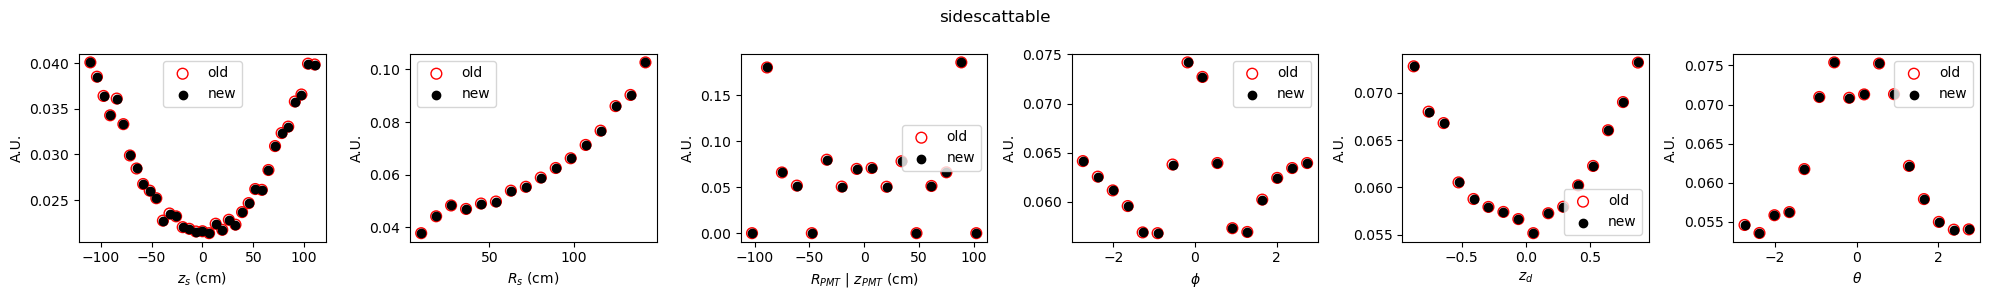

In [66]:
dims = list(range(6))
vars = {0:r"$z_s$ (cm)", 1:r"$R_s$ (cm)", 2:r"$R_{PMT} ~|~ z_{PMT}$ (cm)", 3:r"$\phi$", 4:r"$z_d$", 5:r"$\theta$"}

bins = tables[f"{name}_bins"]

plt.figure(figsize=[20, 3])
plt.suptitle(name)
for pax in range(0, 6):

    nbins  = bins[0][pax]
    bounds = bins[1][pax]
    dx = (bounds[-1] - bounds[0])/nbins
    x = np.linspace(bounds[0]+dx, bounds[-1]-dx, nbins)

    plt.subplot(1, 6, pax+1)
    # old
    proj = otab.sum(axis=tuple(np.delete(dims, pax)))
    plt.scatter(x, proj/np.sum(proj), label="old", edgecolor="red", s=60, c="none")

    # new
    proj = tab.sum(axis=tuple(np.delete(dims, pax)))
    plt.scatter(x, proj/np.sum(proj), color="k", label="new")

    plt.xlabel(vars[pax])
    plt.ylabel("A.U.")
    plt.legend()
    plt.tight_layout()

In [27]:
bounds

[-116.94999999999999, 116.94999999999999]

In [10]:
ROOT.gSystem.AddDynamicPath(os.path.expandvars("$HOME/Software/WCSim/install/lib"))
ROOT.gSystem.Load          ("libWCSimRoot.dylib" if sys.platform == "darwin" else "libWCSimRoot.so")

filename = os.path.expandvars("$LUSTRE/STable/file/out_e-_1.root")
tubeid_bottom, tubeid_top, tubeid_side = split_tubeids(filename, vaxis=1)
df, pmts_df = read_wcsim_geometry(filename)

In [11]:
df

,WC
WCCylRadius,1646.639404
WCCylLength,3377.589417
Geo_Type,0.000000
WCNumPMT,2014.000000
WCPMTRadius,4.000000
WCOffset0,0.000000
WCOffset1,0.000000
WCOffset2,0.000000


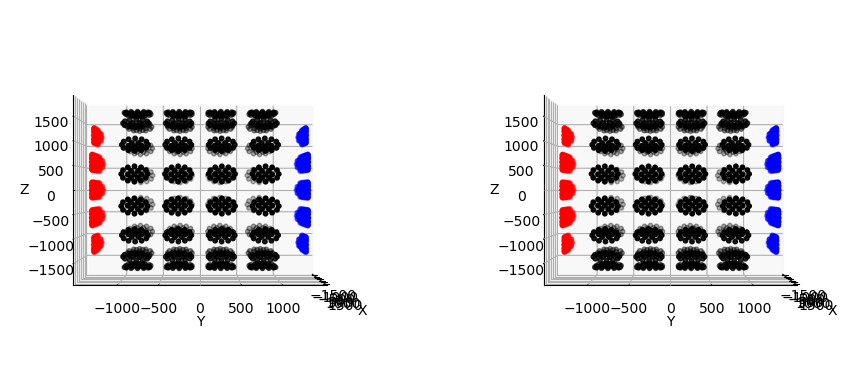

In [13]:
fig = plt.figure(figsize=[10, 4])

# my
ax = fig.add_subplot(121, projection='3d')

# bottom
sel = np.isin(pmts_df.TubeNo, tubeid_bottom)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="red", label="bottom")

# top
sel = np.isin(pmts_df.TubeNo, tubeid_top)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="blue", label="top")

# side
sel = np.isin(pmts_df.TubeNo, tubeid_side)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="black", label="side")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(0, 0)

ax = fig.add_subplot(122, projection='3d')

x = pmts_df.Position_x0
y = pmts_df.Position_x1
z = pmts_df.Position_x2

# side
sel = (-1100<y) & (y<1100)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="black", label="side")

# bottom
sel = (y<-1100)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="red", label="bottom")

# top
sel = (1100<y)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="blue", label="top")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(0, 0)

plt.tight_layout()